# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"
output_dir = output_data_file.split('/')

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = [] #?? get country code from citipy? 

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country)

# Print the city count to confirm sufficient count
len(cities)

586

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#create url
units = "imperial"
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={api_keys.api_key}&q={city}&units={units}"

In [4]:
# loop thru all cities, check if city can be found in openweathermap
# if found, add city to bucket set; if not found, skip and continue
# OpenWeatherMap free account allows 60 calls/min, 
# request 50 cities at a time, wait 55secs then continue loop

city = []       #response["name"]
cloudiness = [] #response["clouds"]["all"]
country = []    #response["sys"]["country"]
date = []       #response["dt"]
humidity = []   #response["main"]["humidity"]
lat = []        #response["coord"]["lat"]
lng = []        #response["coord"]["lon"]
max_temp = []   #response["main"]["temp_max"]
wind_speed = [] #response["wind"]["speed"]
city_not_found = []
sleep_interval = 0

basket_counter = 1
city_counter = 0

newline = '\n'
first_line = "Beginning Data Retrieval"
last_line = "Data Retrieval Complete"
just_line = "-------------------------------------"
not_found = "City not found... Skipping"
print(first_line)
print(just_line)
output_log = os.path.join(output_dir[0], "output_log.txt")
with open(output_log, 'w', newline='') as logfile:
    logfile.write(first_line + newline)
    logfile.write(just_line + newline)
    
    start_time = time.time()
    
    for x in range(len(cities)):

        query_url = f"{url}appid={api_keys.api_key}&q={cities[x]}&units={units}"
        
        response = requests.get(query_url).json()

        try:
            city.append(response["name"])

            try:
                country.append(response["sys"]["country"])
                date.append(response["dt"])
                humidity.append(response["main"]["humidity"])
                lat.append(response["coord"]["lat"])
                lng.append(response["coord"]["lon"])
                max_temp.append(response["main"]["temp_max"])
                wind_speed.append(response["wind"]["speed"])
                cloudiness.append(response["clouds"]["all"])

                city_counter += 1
                process_msg = f"Processing Record {city_counter} of Set {basket_counter} | {cities[x]}"
                print(process_msg)
                print(query_url)
                logfile.write(process_msg + newline)
                logfile.write(query_url + newline)
                
                if (len(city) % 50) == 0:
                    sleep_interval = time.time() - start_time
                    basket_counter += 1
                    city_counter = 0
                    time.sleep(60 - sleep_interval)
                    start_time = time.time()

            except:
                process_msg = "Other error."
                print(process_msg)
                logfile.write(process_msg + newline)
                pass

        except:
            process_msg = f"{not_found} {cities[x]}"
            print(process_msg)
            logfile.write(process_msg + newline)
            city_not_found.append(cities[x])
            pass

    logfile.write(just_line + newline)
    logfile.write(last_line + newline)
    logfile.write(just_line + newline)


Beginning Data Retrieval
-------------------------------------
Processing Record 1 of Set 1 | butaritari
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=butaritari&units=imperial
Processing Record 2 of Set 1 | quang ngai
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=quang ngai&units=imperial
Processing Record 3 of Set 1 | ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=ushuaia&units=imperial
Processing Record 4 of Set 1 | dikson
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=dikson&units=imperial
City not found... Skipping illoqqortoormiut
Processing Record 5 of Set 1 | mostovskoy
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=mostovskoy&units=imperial
Processing Record 6 of Set 1 | albany
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=a

Processing Record 4 of Set 2 | alofi
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=alofi&units=imperial
Processing Record 5 of Set 2 | adrar
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=adrar&units=imperial
Processing Record 6 of Set 2 | rosetta
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=rosetta&units=imperial
Processing Record 7 of Set 2 | tuatapere
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=tuatapere&units=imperial
Processing Record 8 of Set 2 | bam
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=bam&units=imperial
Processing Record 9 of Set 2 | port-gentil
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=port-gentil&units=imperial
Processing Record 10 of Set 2 | new norfolk
http://api.openweathermap.org/data/2.5/weather?appid=a967d36

Processing Record 8 of Set 3 | kalmar
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=kalmar&units=imperial
Processing Record 9 of Set 3 | puerto cabezas
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=puerto cabezas&units=imperial
Processing Record 10 of Set 3 | sao filipe
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=sao filipe&units=imperial
Processing Record 11 of Set 3 | biak
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=biak&units=imperial
Processing Record 12 of Set 3 | santa vitoria
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=santa vitoria&units=imperial
Processing Record 13 of Set 3 | iqaluit
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=iqaluit&units=imperial
Processing Record 14 of Set 3 | plesetsk
http://api.openweathermap.org/d

Processing Record 12 of Set 4 | fare
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=fare&units=imperial
Processing Record 13 of Set 4 | lorengau
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=lorengau&units=imperial
Processing Record 14 of Set 4 | haines city
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=haines city&units=imperial
Processing Record 15 of Set 4 | cairns
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=cairns&units=imperial
Processing Record 16 of Set 4 | qaqortoq
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=qaqortoq&units=imperial
Processing Record 17 of Set 4 | praia da vitoria
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=praia da vitoria&units=imperial
Processing Record 18 of Set 4 | naze
http://api.openweathermap.org/data/

Processing Record 14 of Set 5 | colombia
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=colombia&units=imperial
Processing Record 15 of Set 5 | kichera
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=kichera&units=imperial
Processing Record 16 of Set 5 | xinxiang
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=xinxiang&units=imperial
Processing Record 17 of Set 5 | hovd
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=hovd&units=imperial
Processing Record 18 of Set 5 | coralville
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=coralville&units=imperial
Processing Record 19 of Set 5 | mount gambier
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=mount gambier&units=imperial
Processing Record 20 of Set 5 | talnakh
http://api.openweathermap.org/data/2.5

Processing Record 19 of Set 6 | ketchikan
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=ketchikan&units=imperial
Processing Record 20 of Set 6 | puerto madero
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=puerto madero&units=imperial
Processing Record 21 of Set 6 | balkanabat
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=balkanabat&units=imperial
Processing Record 22 of Set 6 | hobyo
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=hobyo&units=imperial
Processing Record 23 of Set 6 | joensuu
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=joensuu&units=imperial
Processing Record 24 of Set 6 | gamba
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=gamba&units=imperial
Processing Record 25 of Set 6 | formosa
http://api.openweathermap.org/data/2.5/w

Processing Record 21 of Set 7 | ngong
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=ngong&units=imperial
City not found... Skipping agva
Processing Record 22 of Set 7 | egvekinot
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=egvekinot&units=imperial
Processing Record 23 of Set 7 | rauma
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=rauma&units=imperial
Processing Record 24 of Set 7 | mikkeli
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=mikkeli&units=imperial
Processing Record 25 of Set 7 | mana
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=mana&units=imperial
Processing Record 26 of Set 7 | phangnga
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=phangnga&units=imperial
Processing Record 27 of Set 7 | portland
http://api.openweathermap.org

Processing Record 25 of Set 8 | aksarka
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=aksarka&units=imperial
Processing Record 26 of Set 8 | yellowknife
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=yellowknife&units=imperial
Processing Record 27 of Set 8 | carlos chagas
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=carlos chagas&units=imperial
Processing Record 28 of Set 8 | dhidhdhoo
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=dhidhdhoo&units=imperial
Processing Record 29 of Set 8 | fairbanks
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=fairbanks&units=imperial
City not found... Skipping palabuhanratu
Processing Record 30 of Set 8 | dafeng
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=dafeng&units=imperial
Processing Record 31 of Set

Processing Record 28 of Set 9 | otradnoye
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=otradnoye&units=imperial
City not found... Skipping lhuntshi
Processing Record 29 of Set 9 | nantucket
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=nantucket&units=imperial
City not found... Skipping kuche
Processing Record 30 of Set 9 | somerset west
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=somerset west&units=imperial
Processing Record 31 of Set 9 | deputatskiy
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=deputatskiy&units=imperial
Processing Record 32 of Set 9 | buin
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=buin&units=imperial
Processing Record 33 of Set 9 | roald
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=roald&units=imperial
City no

Processing Record 30 of Set 10 | vila franca do campo
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=vila franca do campo&units=imperial
Processing Record 31 of Set 10 | ust-kuyga
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=ust-kuyga&units=imperial
Processing Record 32 of Set 10 | nobres
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=nobres&units=imperial
Processing Record 33 of Set 10 | chiredzi
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=chiredzi&units=imperial
Processing Record 34 of Set 10 | springbok
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=springbok&units=imperial
Processing Record 35 of Set 10 | san miguel
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=san miguel&units=imperial
Processing Record 36 of Set 10 | phek
http://api

Processing Record 33 of Set 11 | aguada de pasajeros
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=aguada de pasajeros&units=imperial
Processing Record 34 of Set 11 | roma
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=roma&units=imperial
Processing Record 35 of Set 11 | el alto
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=el alto&units=imperial
Processing Record 36 of Set 11 | ouesso
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=ouesso&units=imperial
Processing Record 37 of Set 11 | fort nelson
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=fort nelson&units=imperial
Processing Record 38 of Set 11 | cayenne
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=cayenne&units=imperial


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# create city data frame
city_df = pd.DataFrame({"City" : city,
                       "Cloudiness" : cloudiness,
                       "Country" : country,
                       "Date" : date,
                       "Humidity" : humidity,
                       "Lat" : lat,
                       "Lng" : lng,
                       "Max Temp" : max_temp,
                       "Wind Speed" : wind_speed})

city_df.count()

City          538
Cloudiness    538
Country       538
Date          538
Humidity      538
Lat           538
Lng           538
Max Temp      538
Wind Speed    538
dtype: int64

In [6]:
#export to csv file
output_file = os.path.join(output_dir[0], output_dir[1])
city_df.to_csv(output_file, index=True)

In [7]:
city_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Butaritari,51,KI,1604800488,70,3.07,172.79,81.27,9.26
1,Quang Ngai,57,VN,1604800488,78,15.12,108.80,77.99,11.83
2,Ushuaia,20,AR,1604800488,44,-54.80,-68.30,57.20,14.99
3,Dikson,100,RU,1604800488,90,73.51,80.55,-2.34,13.67
4,Mostovskoy,23,RU,1604800488,83,44.41,40.79,40.80,4.29
...,...,...,...,...,...,...,...,...,...
533,Rome,1,US,1604801081,81,43.21,-75.46,55.00,0.67
534,El Alto,46,PE,1604801091,89,-4.27,-81.21,62.44,18.05
535,Ouésso,43,CG,1604801091,96,1.61,16.05,70.05,1.36
536,Fort Nelson,20,CA,1604800805,92,58.81,-122.70,8.60,3.36


In [8]:
city_df.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,538.000000,5.380000e+02,538.000000,538.000000,538.000000,538.000000,538.000000
mean,49.197026,1.604801e+09,73.312268,20.368290,20.152249,56.922714,8.011227
std,40.684898,1.931231e+02,19.227422,34.057832,91.805139,23.253307,6.088526
min,0.000000,1.604800e+09,7.000000,-54.800000,-179.170000,-23.960000,0.340000
25%,1.000000,1.604801e+09,63.000000,-7.255000,-59.617500,39.405000,3.490000
50%,42.000000,1.604801e+09,78.000000,23.410000,23.255000,62.010000,6.410000
75%,90.750000,1.604801e+09,88.000000,50.222500,101.415000,75.945000,11.022500
max,100.000000,1.604801e+09,100.000000,78.220000,179.320000,96.800000,51.670000


**Remove cities where Humidity > 100%**  
Not necessary if there are no cities with Humidity > 100%

In [9]:
humid_cities = city_df["City"].loc[city_df["Humidity"] > 100].count()
if humid_cities > 0:
    city_df = city_df.loc[city_df["Humidity"] <= 100]
city_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Butaritari,51,KI,1604800488,70,3.07,172.79,81.27,9.26
1,Quang Ngai,57,VN,1604800488,78,15.12,108.80,77.99,11.83
2,Ushuaia,20,AR,1604800488,44,-54.80,-68.30,57.20,14.99
3,Dikson,100,RU,1604800488,90,73.51,80.55,-2.34,13.67
4,Mostovskoy,23,RU,1604800488,83,44.41,40.79,40.80,4.29
...,...,...,...,...,...,...,...,...,...
533,Rome,1,US,1604801081,81,43.21,-75.46,55.00,0.67
534,El Alto,46,PE,1604801091,89,-4.27,-81.21,62.44,18.05
535,Ouésso,43,CG,1604801091,96,1.61,16.05,70.05,1.36
536,Fort Nelson,20,CA,1604800805,92,58.81,-122.70,8.60,3.36


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

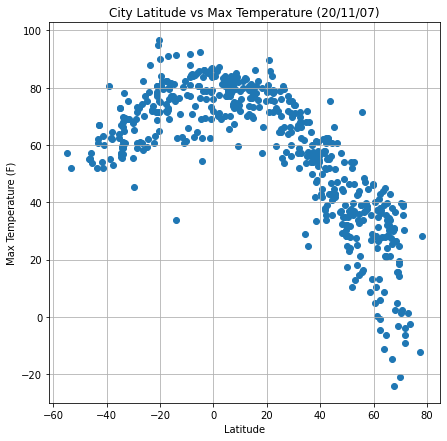

In [10]:
# create a scatter plot latitude v temperature
from datetime import datetime
dt = int(date[0])
plot_date = datetime.fromtimestamp(dt).strftime('%y/%m/%d')
x_lat = city_df['Lat']
y_temp = city_df['Max Temp']
fig, ax = plt.subplots(figsize=(7,7))
ax.set_autoscale_on(True)
ax.scatter(x_lat, y_temp)
plt.title(f"City Latitude vs Max Temperature ({plot_date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
#plt.show()
file = os.path.join("images", "lat_temp.png")
plt.savefig(file)


#### Latitude vs. Humidity Plot

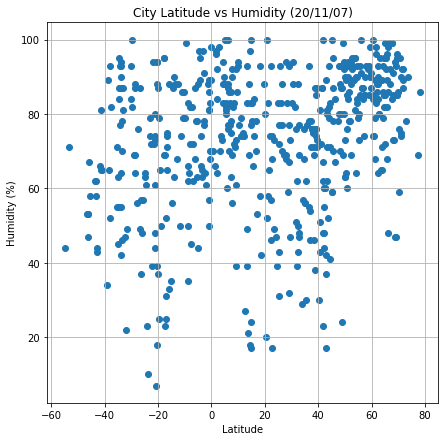

In [11]:
y_hum = city_df["Humidity"]

fig, ax1 = plt.subplots(figsize=(7,7))
ax1.set_autoscale_on(True)
ax1.scatter(x_lat, y_hum)
plt.title(f"City Latitude vs Humidity ({plot_date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
#plt.show()
file = os.path.join("images", "lat_humid.png")
plt.savefig(file)

#### Latitude vs. Cloudiness Plot

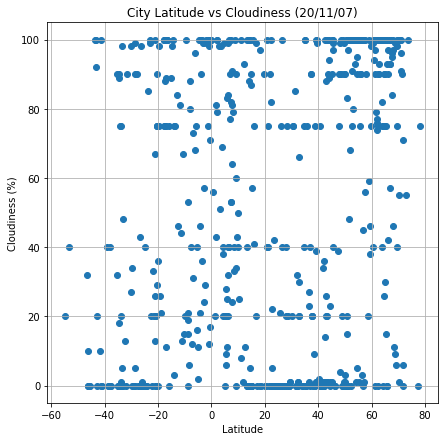

In [12]:
y_cloud = city_df["Cloudiness"]
fig, ax2 = plt.subplots(figsize=(7,7))
ax2.set_autoscale_on(True)
ax2.scatter(x_lat, y_cloud)
plt.title(f"City Latitude vs Cloudiness ({plot_date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
#plt.show()
file = os.path.join("images", "lat_cloud.png")
plt.savefig(file)

#### Latitude vs. Wind Speed Plot

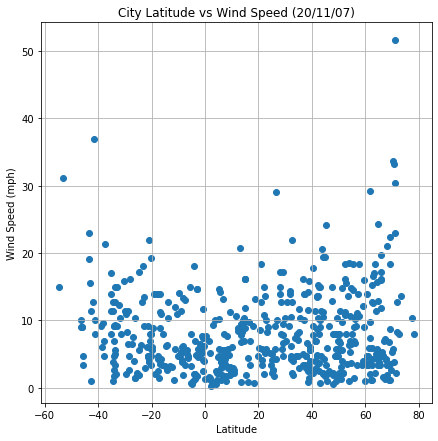

In [13]:
y_wind = city_df["Wind Speed"]
fig, ax3 = plt.subplots(figsize=(7,7))
ax3.set_autoscale_on(True)
ax3.scatter(x_lat, y_wind)
plt.title(f"City Latitude vs Wind Speed ({plot_date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
#plt.show()
file = os.path.join("images", "lat_wind.png")
plt.savefig(file)

## Linear Regression

In [14]:
# dependencies
import scipy.stats as st

### Create data frame for northern and southern hemispheres

In [15]:
# northern hemisphere data frame
north_df = city_df.loc[city_df["Lat"] >= 0]
north_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Butaritari,51,KI,1604800488,70,3.07,172.79,81.27,9.26
1,Quang Ngai,57,VN,1604800488,78,15.12,108.80,77.99,11.83
3,Dikson,100,RU,1604800488,90,73.51,80.55,-2.34,13.67
4,Mostovskoy,23,RU,1604800488,83,44.41,40.79,40.80,4.29
5,Albany,14,US,1604800488,60,42.60,-73.97,55.00,3.65
...,...,...,...,...,...,...,...,...,...
532,Aguada de Pasajeros,100,CU,1604801090,93,22.39,-80.85,71.56,13.69
533,Rome,1,US,1604801081,81,43.21,-75.46,55.00,0.67
535,Ouésso,43,CG,1604801091,96,1.61,16.05,70.05,1.36
536,Fort Nelson,20,CA,1604800805,92,58.81,-122.70,8.60,3.36


In [34]:
# southern hemisphere data frame
south_df = city_df.loc[city_df["Lat"] < 0]
south_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
2,Ushuaia,20,AR,1604800488,44,-54.80,-68.30,57.20,14.99
9,Itarema,57,BR,1604800489,77,-2.92,-39.92,79.30,14.65
10,Punta Arenas,40,CL,1604800433,71,-53.15,-70.92,51.80,31.09
15,Saint-Philippe,20,RE,1604800489,72,-21.36,55.77,71.60,4.70
16,Karema,31,TZ,1604800489,72,-6.82,30.44,73.74,4.99
...,...,...,...,...,...,...,...,...,...
518,Santa Maria,0,BR,1604800801,82,-29.68,-53.81,65.35,10.92
519,Belmonte,75,BR,1604801089,88,-15.86,-38.88,77.00,8.05
524,Santo Antônio do Sudoeste,1,BR,1604800908,48,-26.07,-53.73,70.16,1.45
531,São José da Coroa Grande,21,BR,1604801090,83,-8.90,-35.15,77.05,11.41


### Northern Hemisphere - Max Temperature vs Latitude

In [17]:
north_x_lat = north_df["Lat"]
north_y_temp = north_df["Max Temp"]

nt_corr_coef = round(st.pearsonr(north_x_lat, north_y_temp)[0],2)
print(f"correlation coefficient: {nt_corr_coef}")

n_temp = st.linregress(north_x_lat, north_y_temp)
print(f"The r-value is {round(n_temp.rvalue,2)}")


correlation coefficient: -0.87
The r-value is -0.87


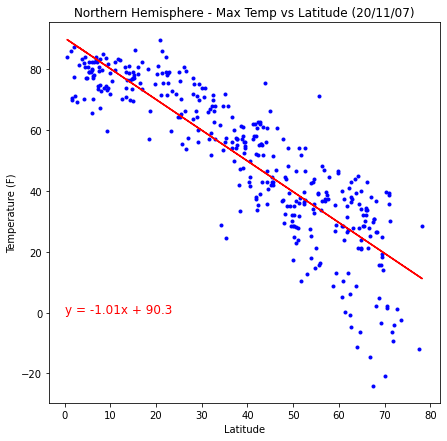

In [18]:
#create equation of line
line = n_temp.slope * north_x_lat + n_temp.intercept
line_eq = f"y = {round(n_temp.slope,2)}x + {round(n_temp.intercept,2)}"

# plot linear model on top of scatter plot
fig, ax = plt.subplots(figsize=(7,7))
ax.set_autoscale_on(True)
ax.scatter(north_x_lat, north_y_temp, marker='.', facecolors="blue", edgecolors="blue")
plt.plot(north_x_lat, line, 'r-')
plt.title(f"Northern Hemisphere - Max Temp vs Latitude ({plot_date})")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.annotate(line_eq, (0,0), fontsize=12, color="red")

file = os.path.join("images", "north_lat_temp.png")
plt.savefig(file)

### Southern Hemisphere - Max Temperature vs Latitude

In [19]:
south_x_lat = south_df["Lat"]
south_y_temp = south_df["Max Temp"]

s_corr_coef = round(st.pearsonr(south_x_lat, south_y_temp)[0],2)
print(f"correlation coefficient: {s_corr_coef}")

s_temp = st.linregress(south_x_lat, south_y_temp)
print(f"The r-value is {s_temp.rvalue}")


correlation coefficient: 0.6
The r-value is 0.5974444713148165


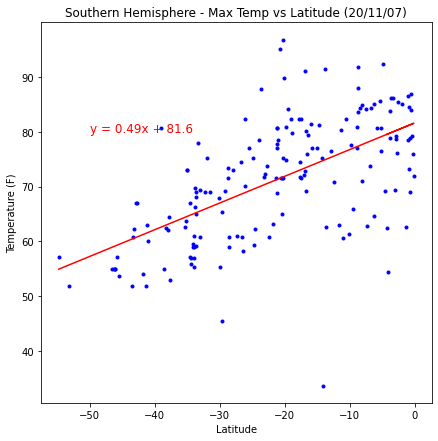

In [20]:
#create equation of line
line = s_temp.slope * south_x_lat + s_temp.intercept
line_eq = f"y = {round(s_temp.slope,2)}x + {round(s_temp.intercept,2)}"

# plot linear model on top of scatter plot
fig, axs = plt.subplots(figsize=(7,7))
axs.set_autoscale_on(True)
axs.scatter(south_x_lat, south_y_temp, marker='.', facecolors="blue", edgecolors="blue")
plt.plot(south_x_lat, line, 'r-')
plt.title(f"Southern Hemisphere - Max Temp vs Latitude ({plot_date})")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.annotate(line_eq, (-50,80), fontsize=12, color="red")

file = os.path.join("images", "south_lat_temp.png")
plt.savefig(file)

**Temperature (F) vs Latitude Linear Regression (Northern and Southern Hemisphere)**

* The correlation coeffient and linear regression model shows a strong negative correlation between latitude and maximum temperature in the northern hemisphere. As the latitude decreases, the temperature increases.

* In the southern hemisphere, the correlation coefficient and linear regression model shows a moderate positive correlation between latitude and maximum temperature. As the latitude increases towards zero, the temperature increases as well.


### Northern Hemisphere - Humidity (%) vs Latitude

In [21]:
north_y_hum = north_df["Humidity"]

n_corr_coef = round(st.pearsonr(north_x_lat, north_y_hum)[0],2)
print(f"correlation coefficient: {n_corr_coef}")

n_humid = st.linregress(north_x_lat, north_y_hum)
print(f"The r-value is {n_humid.rvalue}")


correlation coefficient: 0.24
The r-value is 0.23655300468903168


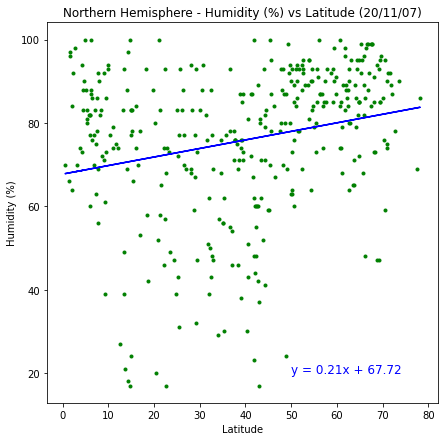

In [22]:
#create equation of line
line = n_humid.slope * north_x_lat + n_humid.intercept
line_eq = f"y = {round(n_humid.slope,2)}x + {round(n_humid.intercept,2)}"

# plot linear model on top of scatter plot
fig, nh = plt.subplots(figsize=(7,7))
nh.set_autoscale_on(True)
nh.scatter(north_x_lat, north_y_hum, marker='.', facecolors="green", edgecolors="green")
plt.plot(north_x_lat, line, 'b-')
plt.title(f"Northern Hemisphere - Humidity (%) vs Latitude ({plot_date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.annotate(line_eq, (50,20), fontsize=12, color="blue")

file = os.path.join("images", "north_lat_humid.png")
plt.savefig(file)

### Southern Hemisphere - Humidity (%) vs Latitude

In [23]:
south_y_hum = south_df["Humidity"]

s_corr_coef = round(st.pearsonr(south_x_lat, south_y_hum)[0],2)
print(f"correlation coefficient: {s_corr_coef}")

s_humid = st.linregress(south_x_lat, south_y_hum)
print(f"The r-value is {s_humid.rvalue}")


correlation coefficient: 0.18
The r-value is 0.18093924801081163


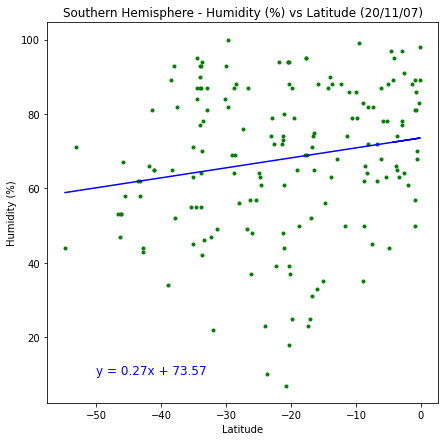

In [24]:
#create equation of line
line = s_humid.slope * south_x_lat + s_humid.intercept
line_eq = f"y = {round(s_humid.slope,2)}x + {round(s_humid.intercept,2)}"

# plot linear model on top of scatter plot
fig, sh = plt.subplots(figsize=(7,7))
sh.set_autoscale_on(True)
sh.scatter(south_x_lat, south_y_hum, marker='.', facecolors="green", edgecolors="green")
plt.plot(south_x_lat, line, 'b-')
plt.title(f"Southern Hemisphere - Humidity (%) vs Latitude ({plot_date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.annotate(line_eq, (-50,10), fontsize=12, color="blue")

file = os.path.join("images", "south_lat_humid.png")
plt.savefig(file)

**Humidity (%) vs Latitude Linear Regression (Northern and Southern Hemisphere)**

* The correlation coefficent and linear regression model for humidity vs latitude shows a weak positive correlation for both hemispheres.

### Northern Hemisphere - Cloudiness (%) vs Latitude

In [25]:
north_y_cloud = north_df["Cloudiness"]

n_corr_coef = round(st.pearsonr(north_x_lat, north_y_cloud)[0],2)
print(f"correlation coefficient: {n_corr_coef}")

north_cloud = st.linregress(north_x_lat, north_y_cloud)
print(f"The r-value is {north_cloud.rvalue}")

correlation coefficient: 0.22
The r-value is 0.2184556587051992


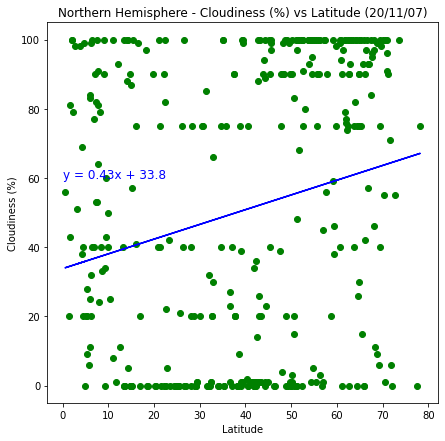

In [26]:
#create equation of line
line = north_cloud.slope * north_x_lat + north_cloud.intercept
line_eq = f"y = {round(north_cloud.slope,2)}x + {round(north_cloud.intercept,2)}"

# plot linear model on top of scatter plot
fig, nc = plt.subplots(figsize=(7,7))
nc.set_autoscale_on(True)
nc.scatter(north_x_lat, north_y_cloud, marker='o', facecolors="green", edgecolors="green")
plt.plot(north_x_lat, line, 'b-')
plt.title(f"Northern Hemisphere - Cloudiness (%) vs Latitude ({plot_date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.annotate(line_eq, (0, 60), fontsize=12, color="blue")

file = os.path.join("images", "north_lat_cloud.png")
plt.savefig(file)

### Southern Hemisphere - Cloudiness (%) vs Latitude

In [27]:
south_y_cloud = south_df["Cloudiness"]

s_corr_coef = round(st.pearsonr(south_x_lat, south_y_cloud)[0],2)
print(f"correlation coefficient: {s_corr_coef}")

south_cloud = st.linregress(south_x_lat, south_y_cloud)
print(f"The r-value is {south_cloud.rvalue}")

correlation coefficient: 0.36
The r-value is 0.35759426963198526


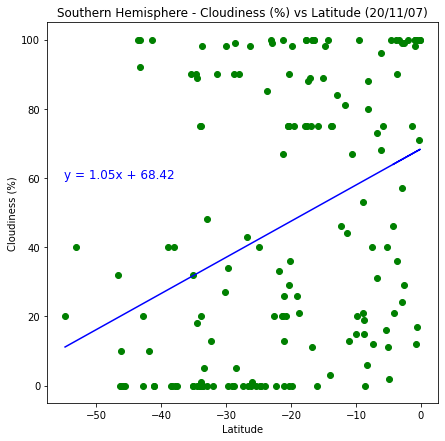

In [28]:
#create equation of line
line = south_cloud.slope * south_x_lat + south_cloud.intercept
line_eq = f"y = {round(south_cloud.slope,2)}x + {round(south_cloud.intercept,2)}"

# plot linear model on top of scatter plot
fig, sc = plt.subplots(figsize=(7,7))
sc.set_autoscale_on(True)
sc.scatter(south_x_lat, south_y_cloud, marker='o', facecolors="green", edgecolors="green")
plt.plot(south_x_lat, line, 'b-')
plt.title(f"Southern Hemisphere - Cloudiness (%) vs Latitude ({plot_date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.annotate(line_eq, (-55, 60), fontsize=12, color="blue")

file = os.path.join("images", "south_lat_cloud.png")
plt.savefig(file)

**Cloudiness (%) vs Latitude Linear Regression (Northern and Southern Hemisphere)**

* The correlation coefficient and linear regression model show a weak positive correlation between cloudiness and latitude in the northern hemisphere and an even weaker positive correlation in the southern hemisphere.

### Northern Hemisphere - Wind Speed (mph) vs Latitude

In [29]:
north_y_wind = north_df["Wind Speed"]

n_corr_coef = round(st.pearsonr(north_x_lat, north_y_wind)[0],2)
print(f"correlation coefficient: {n_corr_coef}")

north_wind = st.linregress(north_x_lat, north_y_wind)
print(f"The r-value is {north_wind.rvalue}")

correlation coefficient: 0.2
The r-value is 0.19996216190107097


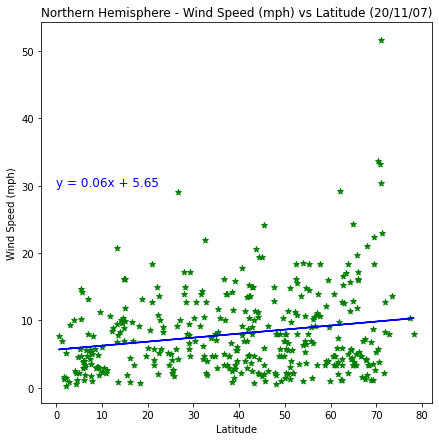

In [30]:
#create equation of line
line = north_wind.slope * north_x_lat + north_wind.intercept
line_eq = f"y = {round(north_wind.slope,2)}x + {round(north_wind.intercept,2)}"

# plot linear model on top of scatter plot
fig, nw = plt.subplots(figsize=(7,7))
nw.set_autoscale_on(True)
nw.scatter(north_x_lat, north_y_wind, marker='*', facecolors="green", edgecolors="green")
plt.plot(north_x_lat, line, 'b-')
plt.title(f"Northern Hemisphere - Wind Speed (mph) vs Latitude ({plot_date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.annotate(line_eq, (0, 30), fontsize=12, color="blue")

file = os.path.join("images", "north_lat_wind.png")
plt.savefig(file)

### Southern Hemisphere - Wind Speed (mph) vs Latitude

In [31]:
south_y_wind = south_df["Wind Speed"]

s_corr_coef = round(st.pearsonr(south_x_lat, south_y_wind)[0],2)
print(f"correlation coefficient: {s_corr_coef}")

south_wind = st.linregress(south_x_lat, south_y_wind)
print(f"The r-value is {south_wind.rvalue}")

correlation coefficient: -0.33
The r-value is -0.32723809552876365


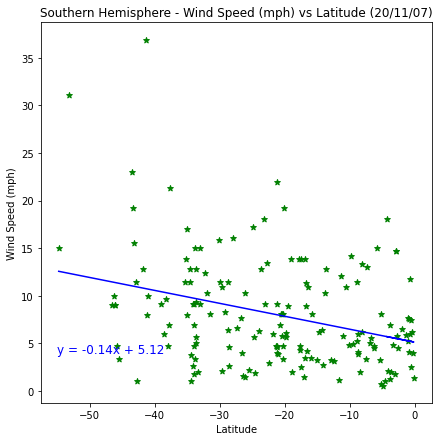

In [32]:
#create equation of line
line = south_wind.slope * south_x_lat + south_wind.intercept
line_eq = f"y = {round(south_wind.slope,2)}x + {round(south_wind.intercept,2)}"

# plot linear model on top of scatter plot
fig, sw = plt.subplots(figsize=(7,7))
sw.set_autoscale_on(True)
sw.scatter(south_x_lat, south_y_wind, marker='*', facecolors="green", edgecolors="green")
plt.plot(south_x_lat, line, 'b-')
plt.title(f"Southern Hemisphere - Wind Speed (mph) vs Latitude ({plot_date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.annotate(line_eq, (-55, 4), fontsize=12, color="blue")

file = os.path.join("images", "south_lat_wind.png")
plt.savefig(file)

**Wind Speed (mph) vs Latitude Linear Regression (Northern and Southern Hemisphere)**

* The correlation coefficient and linear regression model show a weak positive correlation between wind speed (mph) and latitude in the northern hemisphere.

* The correlation coefficient and linear regression model show an almost moderate negative correlation between wind speed (mph) and latitude in the southern hemisphere.

### Temperature (F) vs Latitude
* color based on the temperature

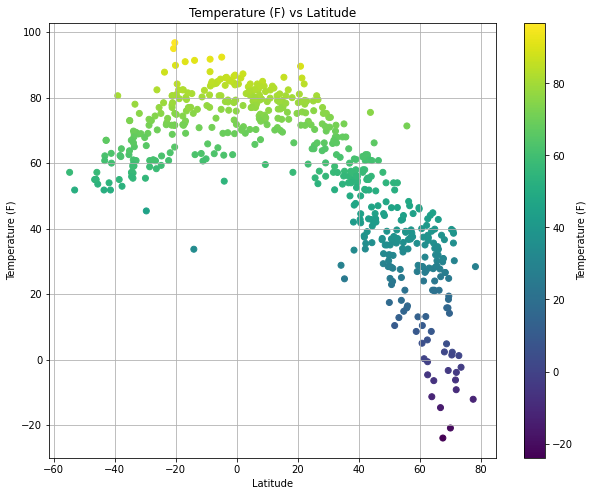

In [33]:
colors = y_temp

fig, ax = plt.subplots(figsize=(10,8))
ax.set_autoscale_on(True)
plt.scatter(x_lat,y_temp, c=colors)
colorbar = plt.colorbar()
colorbar.ax.set_ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("Temperature (F) vs Latitude")
plt.grid()

file = os.path.join("images", "heatmap.png")
plt.savefig(file)